In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [80]:
train=pd.read_csv(r"C:\Users\mylaptop.ge\Desktop\train.csv")
train.shape

(891, 12)

In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
train.drop("Name",axis=1,inplace=True)
train.drop("Ticket",axis=1,inplace=True)
train.drop("PassengerId",axis=1,inplace=True)
train.drop("Cabin",axis=1,inplace=True)
train.drop("Embarked",axis=1,inplace=True)


In [83]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [84]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [85]:
train=train.dropna(axis=0)

In [86]:
response = 'Survived'
predictors = ['Pclass', 'Sex','Age','SibSp','Parch','Fare']

In [93]:
X = train[predictors].values
y = (train[response] == 1).astype(np.int32)
train['Sex'].replace({'male':0, 'female':1}, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [94]:
log_reg = LogisticRegression(solver="lbfgs", random_state=0)

In [95]:
log_reg.fit(X, y)

LogisticRegression(random_state=0)

In [96]:
y_pred = log_reg.predict(X)

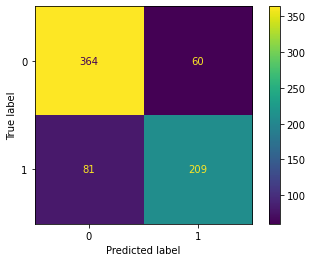

In [97]:
cm = confusion_matrix(y, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()

In [98]:
test=pd.read_csv(r"C:\Users\mylaptop.ge\Desktop\test.csv")

In [99]:
test.drop("Name",axis=1,inplace=True)
test.drop("Ticket",axis=1,inplace=True)
test.drop("PassengerId",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)
test.drop("Embarked",axis=1,inplace=True)
test['Sex'].replace({'male':0, 'female':1}, inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [100]:
test_no_na=test.dropna()
test_no_na.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2.141994,0.383686,30.181269,0.483384,0.398792,40.982087
std,0.846251,0.487019,14.104573,0.875004,0.811582,61.228558
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,2.000000,0.000000,27.000000,0.000000,0.000000,16.000000
75%,3.000000,1.000000,39.000000,1.000000,1.000000,40.633350
max,3.000000,1.000000,76.000000,8.000000,6.000000,512.329200


In [110]:
test['Age']=test['Age'].fillna(30.181269)
test['Fare']=test['Fare'].fillna(40.982087)

In [112]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [114]:
X_test= test[predictors].values

In [115]:
test_pred=log_reg.predict(X_test)

In [116]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [123]:
test1=pd.read_csv(r"C:\Users\mylaptop.ge\Desktop\test.csv")

In [126]:
results= pd.DataFrame({"PassengerId": test1["PassengerId"], "Survived": test_pred})

In [127]:
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [128]:
results.to_csv('submission.csv', index=False)